In [7]:
import json
from pymongo import MongoClient
import tqdm
import matplotlib.pyplot as plt


client = MongoClient("mongodb://localhost:27017/")
db = client["embedded-rift"]
collection = db["games"]

In [56]:
cursor = collection.find({
})
times_all = {"15": [], "14": []}

for x in tqdm.tqdm(cursor):
    times_all[x["metadata"]["season"]].append(x["result"]["gameDuration"] / 60)

times_s15 = times_all["15"]
times_s14 = times_all["14"]
times_all = times_s15 + times_s14


40004it [04:57, 134.57it/s]


Average game duration (Season 14): 26.65, Median: 26.82, Std: 6.92
Average game duration (Season 15): 26.95, Median: 27.47, Std: 6.85
Average game duration (All Seasons): 26.80, Median: 27.15, Std: 6.88


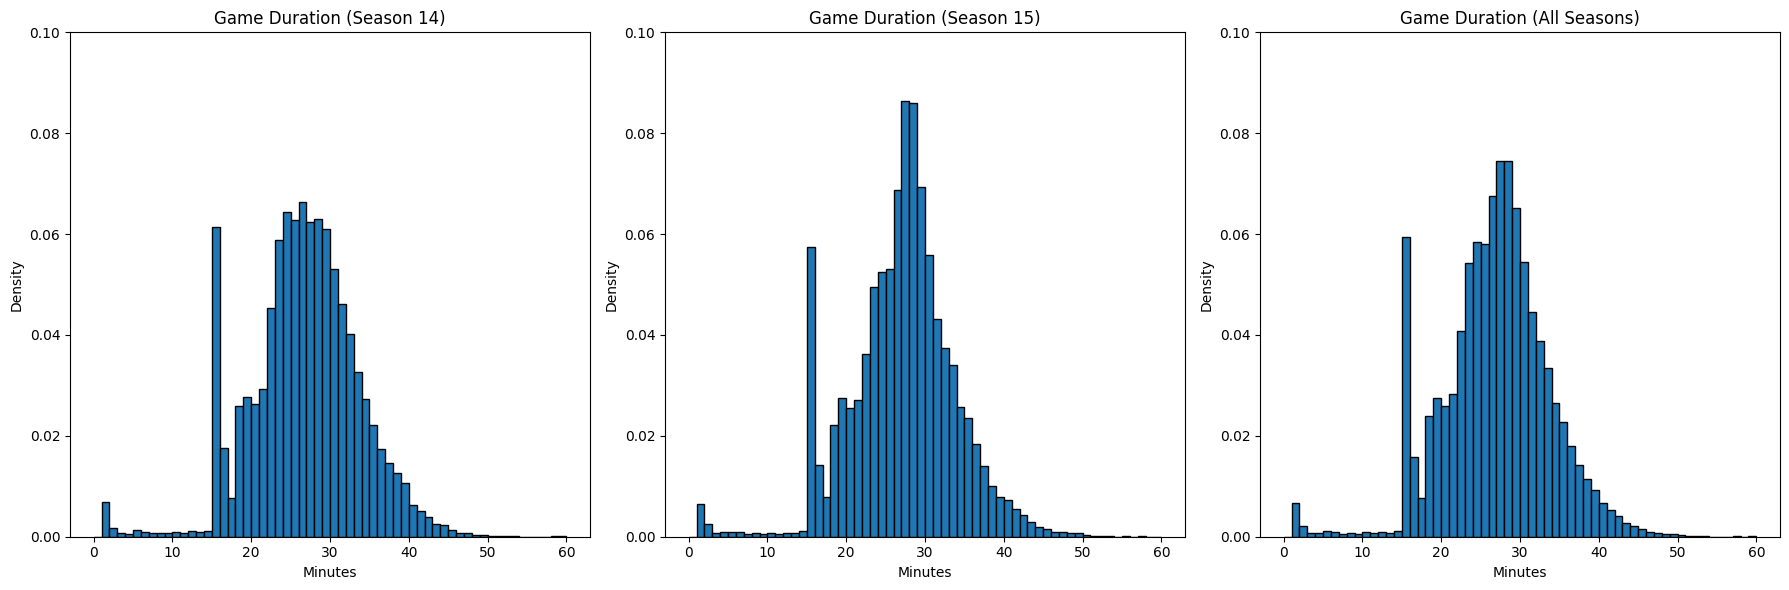

In [57]:
import numpy as np
print(f"Average game duration (Season 14): {np.mean(times_s14):.2f}, Median: {np.median(times_s14):.2f}, Std: {np.std(times_s14):.2f}")
print(f"Average game duration (Season 15): {np.mean(times_s15):.2f}, Median: {np.median(times_s15):.2f}, Std: {np.std(times_s15):.2f}")
print(f"Average game duration (All Seasons): {np.mean(times_all):.2f}, Median: {np.median(times_all):.2f}, Std: {np.std(times_all):.2f}")

plt.figure(figsize=(18, 6))

# Histogram for Season 14
plt.subplot(1, 3, 1)
plt.hist(times_s14, bins=60, range=(0, 60), edgecolor='black', density=True)
plt.xlabel('Minutes')
plt.ylabel('Density')
plt.title('Game Duration (Season 14)')
plt.ylim(0, 0.10)

# Histogram for Season 15
plt.subplot(1, 3, 2)
plt.hist(times_s15, bins=60, range=(0, 60), edgecolor='black', density=True)
plt.xlabel('Minutes')
plt.ylabel('Density')
plt.title('Game Duration (Season 15)')
plt.ylim(0, 0.10)


# Histogram for All Seasons
plt.subplot(1, 3, 3)
plt.hist(times_all, bins=60, range=(0, 60), edgecolor='black', density=True)
plt.xlabel('Minutes')
plt.ylabel('Density')
plt.title('Game Duration (All Seasons)')
plt.ylim(0, 0.10)

# Show the figures
plt.tight_layout()

Average game duration (Season 14): 27.04, Median: 26.95, Std: 6.32
Average game duration (Season 15): 27.35, Median: 27.55, Std: 6.22
Average game duration (All Seasons): 27.20, Median: 27.32, Std: 6.27


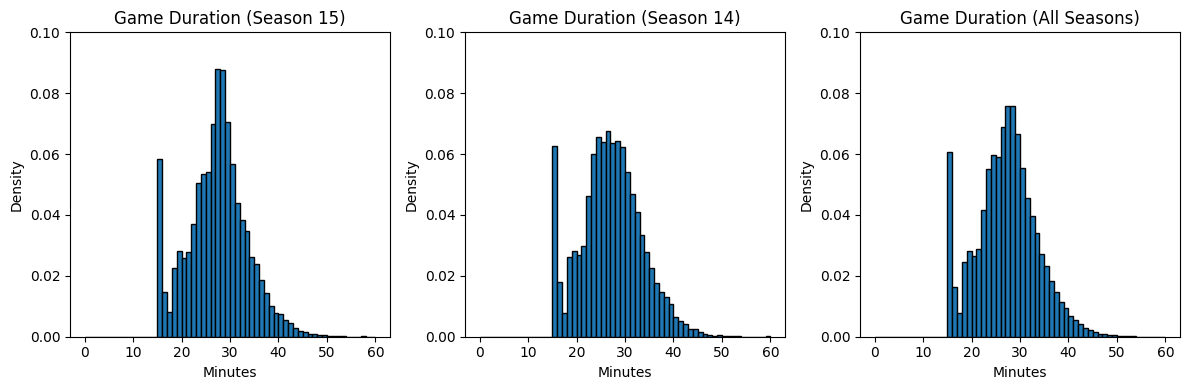

In [58]:
import numpy as np
times_s15 = [x for x in times_s15 if x >= 15]
times_s14 = [x for x in times_s14 if x >= 15]
times_all = [x for x in times_all if x >= 15]
print(f"Average game duration (Season 14): {np.mean(times_s14):.2f}, Median: {np.median(times_s14):.2f}, Std: {np.std(times_s14):.2f}")
print(f"Average game duration (Season 15): {np.mean(times_s15):.2f}, Median: {np.median(times_s15):.2f}, Std: {np.std(times_s15):.2f}")
print(f"Average game duration (All Seasons): {np.mean(times_all):.2f}, Median: {np.median(times_all):.2f}, Std: {np.std(times_all):.2f}")

plt.figure(figsize=(12, 4))

# Histogram for Season 15
plt.subplot(1, 3, 1)
plt.hist(times_s15, bins=60, range=(0, 60), edgecolor='black', density=True)
plt.xlabel('Minutes')
plt.ylabel('Density')
plt.title('Game Duration (Season 15)')
plt.ylim(0, 0.10)

# Histogram for Season 14
plt.subplot(1, 3, 2)
plt.hist(times_s14, bins=60, range=(0, 60), edgecolor='black', density=True)
plt.xlabel('Minutes')
plt.ylabel('Density')
plt.title('Game Duration (Season 14)')
plt.ylim(0, 0.10)

# Histogram for All Seasons
plt.subplot(1, 3, 3)
plt.hist(times_all, bins=60, range=(0, 60), edgecolor='black', density=True)
plt.xlabel('Minutes')
plt.ylabel('Density')
plt.title('Game Duration (All Seasons)')
plt.ylim(0, 0.10)

# Show the figures
plt.tight_layout()

In [59]:
all_games = collection.count_documents({})
print(f"(All) Total games: {all_games}")
blue_wins = collection.count_documents({"result.teams": {"$elemMatch": {"teamId": 100, "win": True}}})
print(f"(All) Blue wins: {blue_wins} ({blue_wins / all_games * 100:.2f}%)")
red_wins = all_games - blue_wins
print(f"(All) Red wins: {red_wins} ({red_wins / all_games * 100:.2f}%)")

s15_games = collection.count_documents({"metadata.season": "15"})
print(f"(S15) Total games: {s15_games}")
s15_blue_wins = collection.count_documents({"metadata.season": "15", "result.teams": {"$elemMatch": {"teamId": 100, "win": True}}})
print(f"(S15) Blue wins: {s15_blue_wins} ({s15_blue_wins / s15_games * 100:.2f}%)")
s15_red_wins = s15_games - s15_blue_wins
print(f"(S15) Red wins: {s15_red_wins} ({s15_red_wins / s15_games * 100:.2f}%)")

s14_games = collection.count_documents({"metadata.season": "14"})
print(f"(S14) Total games: {s14_games}")
s14_blue_wins = collection.count_documents({"metadata.season": "14", "result.teams": {"$elemMatch": {"teamId": 100, "win": True}}})
print(f"(S14) Blue wins: {s14_blue_wins} ({s14_blue_wins / s14_games * 100:.2f}%)")
s14_red_wins = s14_games - s14_blue_wins
print(f"(S14) Red wins: {s14_red_wins} ({s14_red_wins / s14_games * 100:.2f}%)")


(All) Total games: 40004
(All) Blue wins: 20743 (51.85%)
(All) Red wins: 19261 (48.15%)
(S15) Total games: 20003
(S15) Blue wins: 10306 (51.52%)
(S15) Red wins: 9697 (48.48%)
(S14) Total games: 20001
(S14) Blue wins: 10437 (52.18%)
(S14) Red wins: 9564 (47.82%)


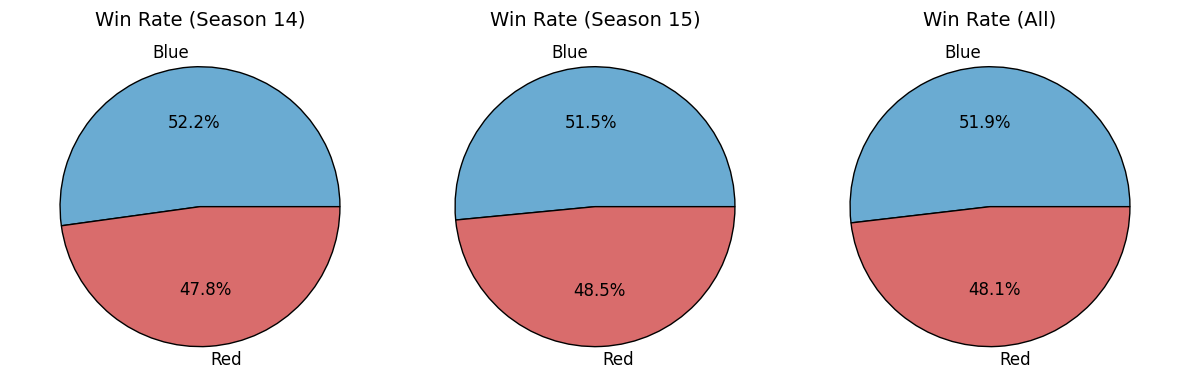

In [60]:

# Define colors with less eye strain
soft_blue = "#6AABD2"  # Softer blue
soft_red = "#D96C6C"   # Softer red

plt.figure(figsize=(12, 4))

# Win Rate (All)
plt.subplot(1, 3, 3)
plt.pie([blue_wins, red_wins], labels=["Blue", "Red"], autopct='%1.1f%%', colors=[soft_blue, soft_red],
        wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})
plt.title('Win Rate (All)', fontsize=14)
plt.axis('equal')

# Win Rate (Season 15)
plt.subplot(1, 3, 2)
plt.pie([s15_blue_wins, s15_red_wins], labels=["Blue", "Red"], autopct='%1.1f%%', colors=[soft_blue, soft_red],
        wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})
plt.title('Win Rate (Season 15)', fontsize=14)
plt.axis('equal')

# Win Rate (Season 14)
plt.subplot(1, 3, 1)
plt.pie([s14_blue_wins, s14_red_wins], labels=["Blue", "Red"], autopct='%1.1f%%', colors=[soft_blue, soft_red],
        wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})
plt.title('Win Rate (Season 14)', fontsize=14)
plt.axis('equal')

# Adjust layout
plt.tight_layout()

In [61]:
from collections import Counter, defaultdict
cursor = collection.find({})
champs = defaultdict(lambda: {"wins": 0, "losses": 0, "games": 0})
champs_s15 = defaultdict(lambda: {"wins": 0, "losses": 0, "games": 0})
champs_s14 = defaultdict(lambda: {"wins": 0, "losses": 0, "games": 0})
for x in tqdm.tqdm(cursor):
    teams = x["result"]["teams"]

    for team in teams:
        team_win = team["win"]  # True if the team won, False otherwise
        
        for player in team["participants"]:
            champ_name = player["championName"]

            # Update total games played
            champs[champ_name]["games"] += 1

            if team_win:
                champs[champ_name]["wins"] += 1
            else:
                champs[champ_name]["losses"] += 1

            # Separate season tracking
            if x["metadata"]["season"] == "15":
                champs_s15[champ_name]["games"] += 1
                if team_win:
                    champs_s15[champ_name]["wins"] += 1
                else:
                    champs_s15[champ_name]["losses"] += 1
            else:
                champs_s14[champ_name]["games"] += 1
                if team_win:
                    champs_s14[champ_name]["wins"] += 1
                else:
                    champs_s14[champ_name]["losses"] += 1
                

        

40004it [04:57, 134.68it/s]


<Figure size 2000x2000 with 0 Axes>

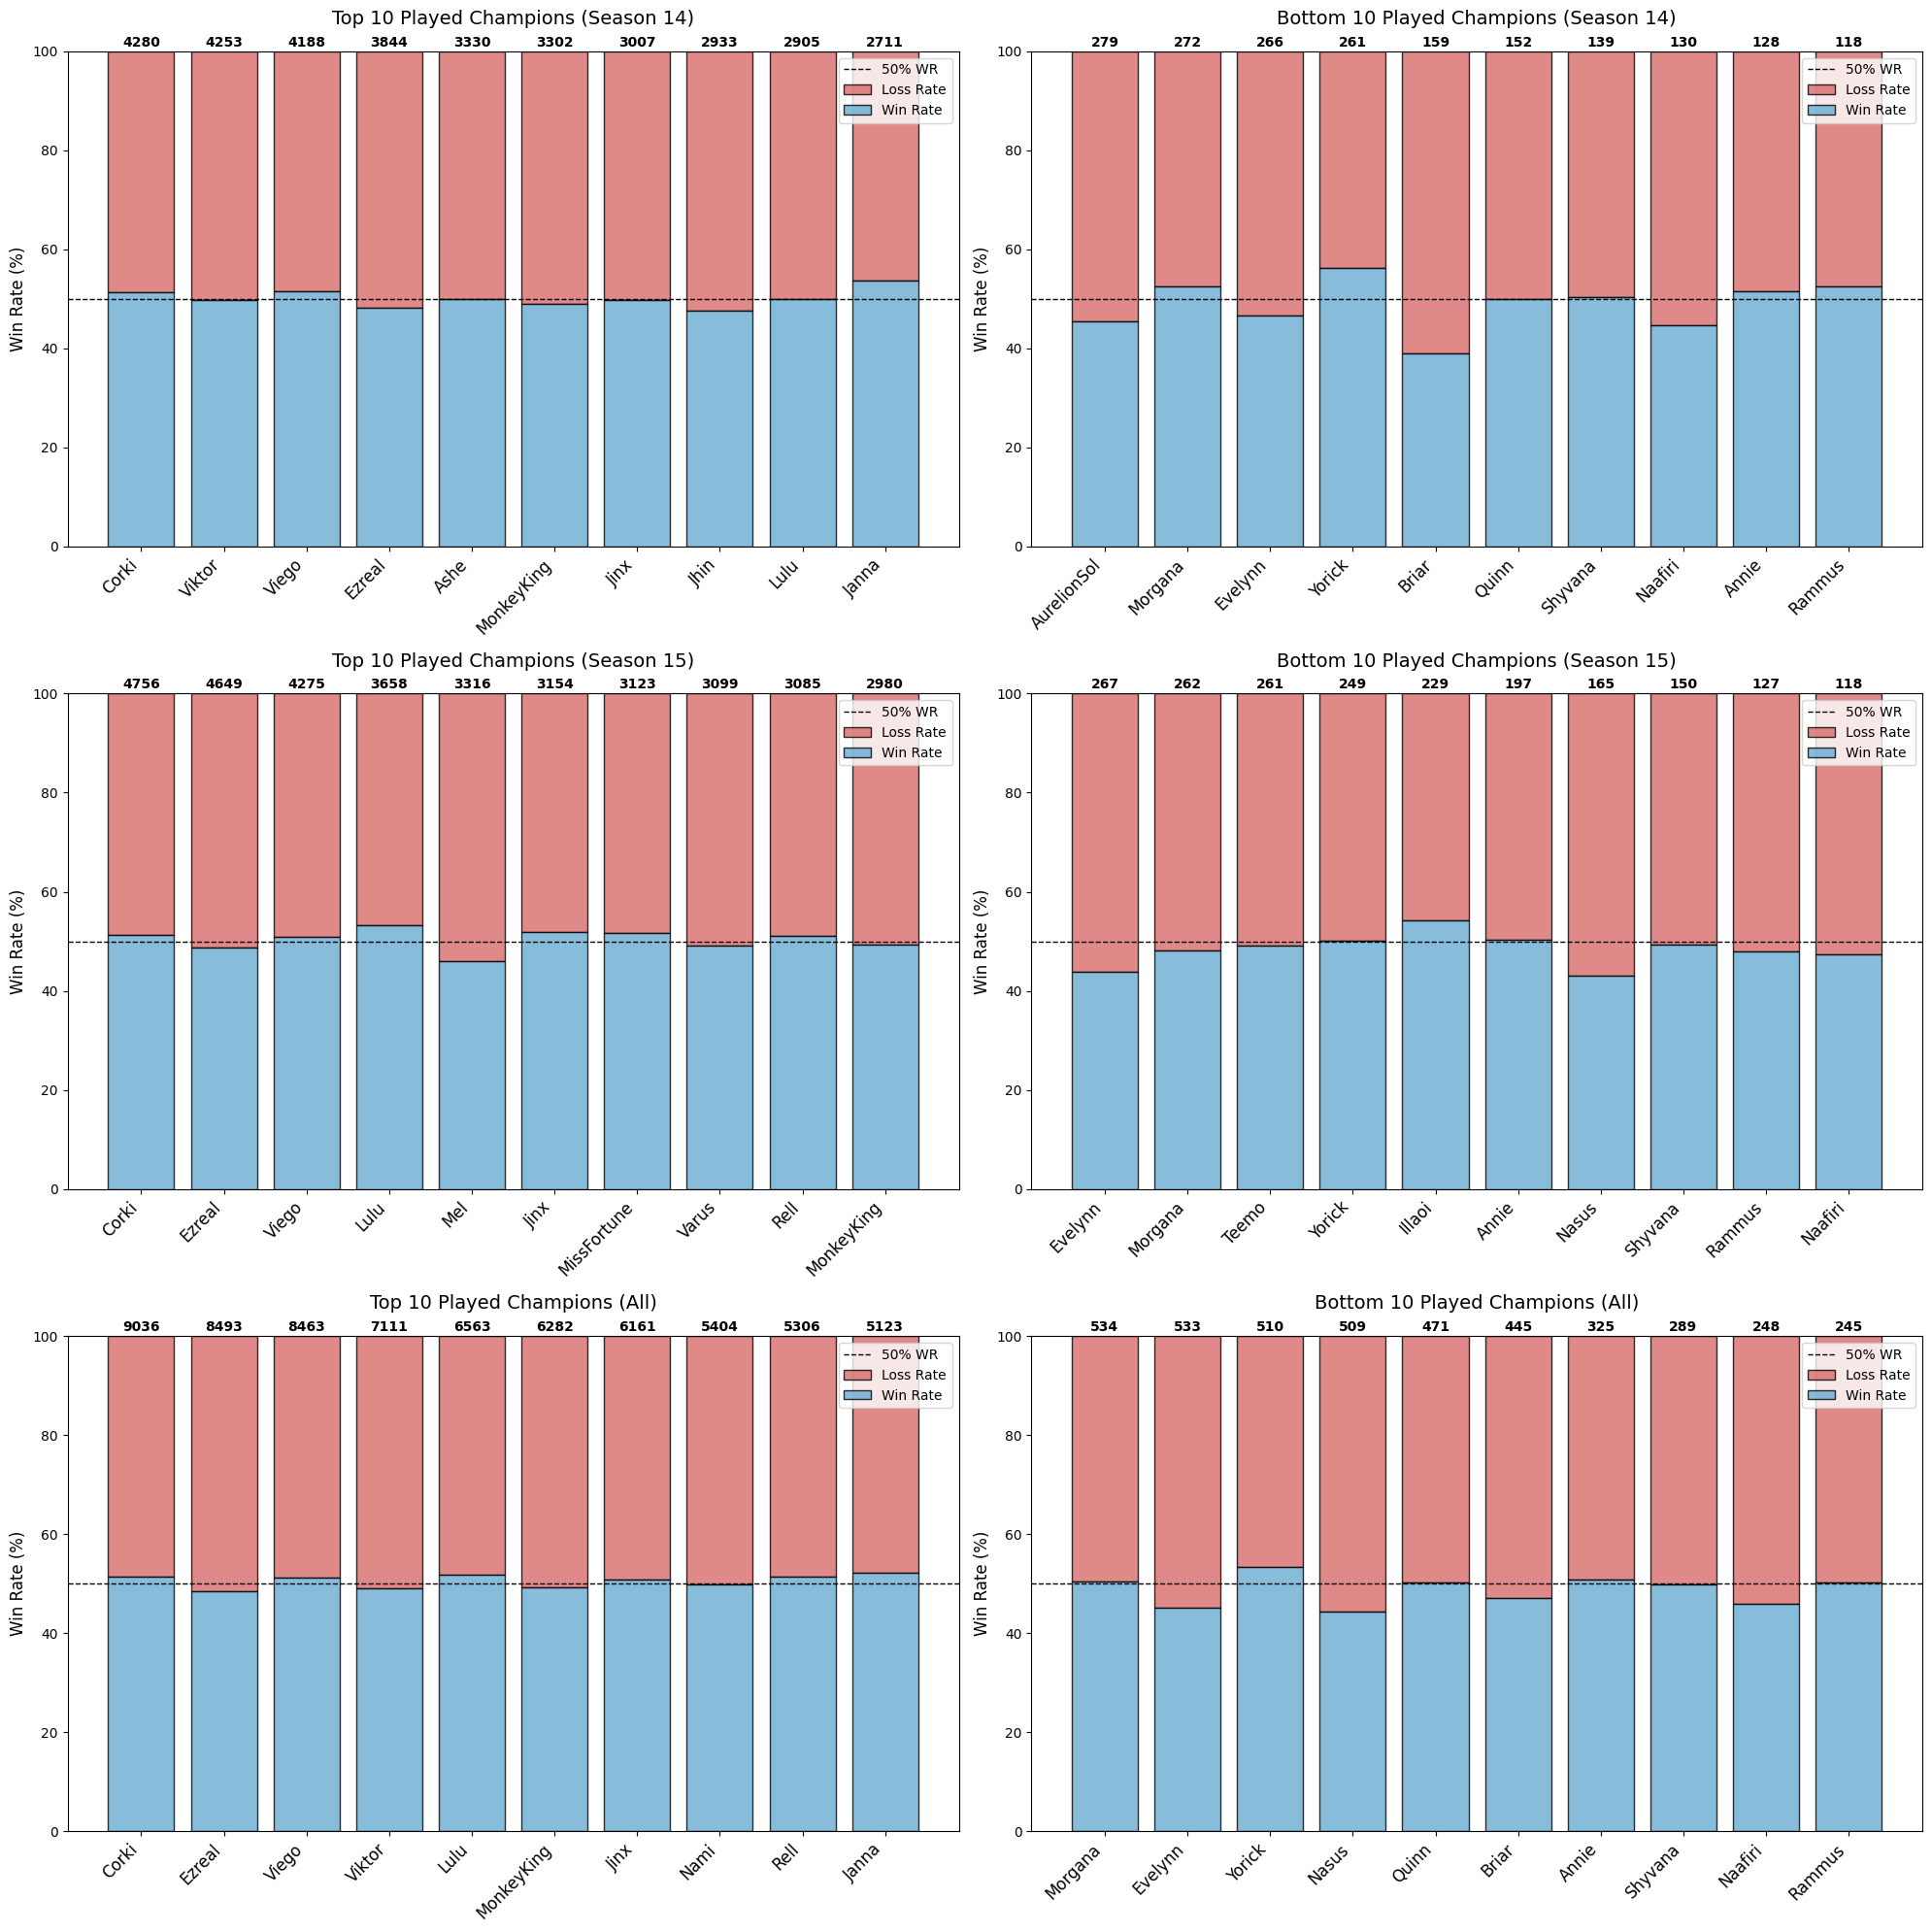

In [62]:
# Sort data by the number of games played for each champion
sorted_champs = sorted(champs.items(), key=lambda x: x[1]["games"], reverse=True)
sorted_champs_s15 = sorted(champs_s15.items(), key=lambda x: x[1]["games"], reverse=True)
sorted_champs_s14 = sorted(champs_s14.items(), key=lambda x: x[1]["games"], reverse=True)

top_10_champs = sorted_champs[:10]
bottom_10_champs = sorted_champs[-10:]
top_10_champs_s15 = sorted_champs_s15[:10]
bottom_10_champs_s15 = sorted_champs_s15[-10:]
top_10_champs_s14 = sorted_champs_s14[:10]
bottom_10_champs_s14 = sorted_champs_s14[-10:]

import numpy as np

def extract_winrate_stats(champ_list):
    labels = [k for k, v in champ_list]
    games = np.array([v["games"] for _, v in champ_list])
    wins = np.array([v["wins"] for _, v in champ_list])
    win_rates = (wins / games) * 100  # Convert to percentage
    loss_rates = 100 - win_rates  # Loss rate as percentage
    return labels, win_rates, loss_rates

labels_top_all, winrate_top_all, lossrate_top_all = extract_winrate_stats(top_10_champs)
labels_bottom_all, winrate_bottom_all, lossrate_bottom_all = extract_winrate_stats(bottom_10_champs)
labels_top_s15, winrate_top_s15, lossrate_top_s15 = extract_winrate_stats(top_10_champs_s15)
labels_bottom_s15, winrate_bottom_s15, lossrate_bottom_s15 = extract_winrate_stats(bottom_10_champs_s15)
labels_top_s14, winrate_top_s14, lossrate_top_s14 = extract_winrate_stats(top_10_champs_s14)
labels_bottom_s14, winrate_bottom_s14, lossrate_bottom_s14 = extract_winrate_stats(bottom_10_champs_s14)


font_size = 12

# Set figure size for better readability
plt.figure(figsize=(20, 20))

# Colors
win_color = "#6AABD2"  # Soft blue for wins
loss_color = "#D96C6C"  # Soft red for losses

# Function to create stacked bar chart with win rate and text annotations for total games played
def plot_stacked_winrate_with_games(subplot_index, labels, winrates, lossrates, champ_list, title):
    plt.subplot(3, 2, subplot_index)
    bars1 = plt.bar(labels, lossrates, bottom=winrates, color=loss_color, edgecolor='black', alpha=0.8, label="Loss Rate")
    bars2 = plt.bar(labels, winrates, color=win_color, edgecolor='black', alpha=0.8, label="Win Rate")

    plt.axhline(y=50, color='black', linestyle='dashed', linewidth=1, label="50% WR")

    plt.xticks(rotation=45, ha='right', fontsize=font_size)
    plt.ylabel("Win Rate (%)", fontsize=12)
    plt.ylim(0, 100)  # Set y-axis to 0-100% for uniform height
    plt.title(title, fontsize=14, pad=20)

    plt.legend()

    # Annotate bars with total games played
    for bar, (champ, data) in zip(bars1, champ_list):
        height = bar.get_height() + bar.get_y()  # Get top of the win bar
        plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{data['games']}", ha='center', fontsize=10, fontweight='bold')

# Create stacked win rate plots with game counts
plt.figure(figsize=(20, 20))

plot_stacked_winrate_with_games(5, labels_top_all, winrate_top_all, lossrate_top_all, top_10_champs, "Top 10 Played Champions (All)")
plot_stacked_winrate_with_games(6, labels_bottom_all, winrate_bottom_all, lossrate_bottom_all, bottom_10_champs, "Bottom 10 Played Champions (All)")
plot_stacked_winrate_with_games(3, labels_top_s15, winrate_top_s15, lossrate_top_s15, top_10_champs_s15, "Top 10 Played Champions (Season 15)")
plot_stacked_winrate_with_games(4, labels_bottom_s15, winrate_bottom_s15, lossrate_bottom_s15, bottom_10_champs_s15, "Bottom 10 Played Champions (Season 15)")
plot_stacked_winrate_with_games(1, labels_top_s14, winrate_top_s14, lossrate_top_s14, top_10_champs_s14, "Top 10 Played Champions (Season 14)")
plot_stacked_winrate_with_games(2, labels_bottom_s14, winrate_bottom_s14, lossrate_bottom_s14, bottom_10_champs_s14, "Bottom 10 Played Champions (Season 14)")

# Adjust layout for readability
plt.tight_layout()

# Show the figure
plt.show()



In [63]:
# Most common champions
most_common = sorted_champs[:10]
most_common_s15 = sorted_champs_s15[:10]
most_common_s14 = sorted_champs_s14[:10]

# Least common champions
least_common = sorted_champs[::-1][:10]
least_common_s15 = sorted_champs_s15[::-1][:10]
least_common_s14 = sorted_champs_s14[::-1][:10]


In [64]:
print("\nMost common champions (Season 14):")
for champ, data in most_common_s14:
    games = data["games"]
    wins = data["wins"]
    losses = data["losses"]
    print(f"{champ:15} {wins:5}W\t- {losses:5}L ({games:5} games) WR: {wins/games*100:.2f}%")
    
print("\nLeast common champions (Season 14):")
for champ, data in least_common_s14:
    games = data["games"]
    wins = data["wins"]
    losses = data["losses"]
    print(f"{champ:15} {wins:5}W\t- {losses:5}L ({games:5} games) WR: {wins/games*100:.2f}%")


Most common champions (Season 14):
Corki            2200W	-  2080L ( 4280 games) WR: 51.40%
Viktor           2117W	-  2136L ( 4253 games) WR: 49.78%
Viego            2158W	-  2030L ( 4188 games) WR: 51.53%
Ezreal           1852W	-  1992L ( 3844 games) WR: 48.18%
Ashe             1667W	-  1663L ( 3330 games) WR: 50.06%
MonkeyKing       1621W	-  1681L ( 3302 games) WR: 49.09%
Jinx             1496W	-  1511L ( 3007 games) WR: 49.75%
Jhin             1395W	-  1538L ( 2933 games) WR: 47.56%
Lulu             1449W	-  1456L ( 2905 games) WR: 49.88%
Janna            1458W	-  1253L ( 2711 games) WR: 53.78%

Least common champions (Season 14):
Rammus             62W	-    56L (  118 games) WR: 52.54%
Annie              66W	-    62L (  128 games) WR: 51.56%
Naafiri            58W	-    72L (  130 games) WR: 44.62%
Shyvana            70W	-    69L (  139 games) WR: 50.36%
Quinn              76W	-    76L (  152 games) WR: 50.00%
Briar              62W	-    97L (  159 games) WR: 38.99%
Yorick         

In [65]:
print("\nMost common champions (Season 15):")
for champ, d in most_common_s15:
    games = d["games"]
    wins = d["wins"]
    losses = d["losses"]
    print(f"{champ:15} {wins:5}W\t- {losses:5}L ({games:5} games) WR: {wins/games*100:.2f}%")


print("\nLeast common champions (Season 15):")
for champ, d in least_common_s15:
    games = d["games"]
    wins = d["wins"]
    losses = d["losses"]
    print(f"{champ:15} {wins:5}W\t- {losses:5}L ({games:5} games) WR: {wins/games*100:.2f}%")




Most common champions (Season 15):
Corki            2443W	-  2313L ( 4756 games) WR: 51.37%
Ezreal           2263W	-  2386L ( 4649 games) WR: 48.68%
Viego            2177W	-  2098L ( 4275 games) WR: 50.92%
Lulu             1951W	-  1707L ( 3658 games) WR: 53.34%
Mel              1526W	-  1790L ( 3316 games) WR: 46.02%
Jinx             1634W	-  1520L ( 3154 games) WR: 51.81%
MissFortune      1611W	-  1512L ( 3123 games) WR: 51.59%
Varus            1522W	-  1577L ( 3099 games) WR: 49.11%
Rell             1575W	-  1510L ( 3085 games) WR: 51.05%
MonkeyKing       1472W	-  1508L ( 2980 games) WR: 49.40%

Least common champions (Season 15):
Naafiri            56W	-    62L (  118 games) WR: 47.46%
Rammus             61W	-    66L (  127 games) WR: 48.03%
Shyvana            74W	-    76L (  150 games) WR: 49.33%
Nasus              71W	-    94L (  165 games) WR: 43.03%
Annie              99W	-    98L (  197 games) WR: 50.25%
Illaoi            124W	-   105L (  229 games) WR: 54.15%
Yorick         

In [66]:
print("\nMost common champions (All):")
for champ, d in most_common:
    games = d["games"]
    wins = d["wins"]
    losses = d["losses"]
    print(f"{champ:15} {wins:5}W\t- {losses:5}L ({games:5} games) WR: {wins/games*100:.2f}%")

print("\nLeast common champions (All):")
for champ, d in least_common:
    games = d["games"]
    wins = d["wins"]
    losses = d["losses"]
    print(f"{champ:15} {wins:5}W\t- {losses:5}L ({games:5} games) WR: {wins/games*100:.2f}%")


Most common champions (All):
Corki            4643W	-  4393L ( 9036 games) WR: 51.38%
Ezreal           4115W	-  4378L ( 8493 games) WR: 48.45%
Viego            4335W	-  4128L ( 8463 games) WR: 51.22%
Viktor           3485W	-  3626L ( 7111 games) WR: 49.01%
Lulu             3400W	-  3163L ( 6563 games) WR: 51.81%
MonkeyKing       3093W	-  3189L ( 6282 games) WR: 49.24%
Jinx             3130W	-  3031L ( 6161 games) WR: 50.80%
Nami             2695W	-  2709L ( 5404 games) WR: 49.87%
Rell             2728W	-  2578L ( 5306 games) WR: 51.41%
Janna            2677W	-  2446L ( 5123 games) WR: 52.25%

Least common champions (All):
Rammus            123W	-   122L (  245 games) WR: 50.20%
Naafiri           114W	-   134L (  248 games) WR: 45.97%
Shyvana           144W	-   145L (  289 games) WR: 49.83%
Annie             165W	-   160L (  325 games) WR: 50.77%
Briar             210W	-   235L (  445 games) WR: 47.19%
Quinn             237W	-   234L (  471 games) WR: 50.32%
Nasus             226W	-   

In [67]:
sorted_by_winrate_s14 = sorted(champs_s14.items(), key=lambda x: x[1]["wins"] / x[1]["games"], reverse=True)
print("\nTop 10 champions by win rate (Season 14):")
for champ, d in sorted_by_winrate_s14[:10]:
    games = d["games"]
    wins = d["wins"]
    losses = d["losses"]
    print(f"{champ:15} {wins:5}W\t- {losses:5}L ({games:5} games) WR: {wins/games*100:.2f}%")
    
print("\nBottom 10 champions by win rate (Season 14):")
for champ, d in sorted_by_winrate_s14[-10:]:
    games = d["games"]
    wins = d["wins"]
    losses = d["losses"]
    print(f"{champ:15} {wins:5}W\t- {losses:5}L ({games:5} games) WR: {wins/games*100:.2f}%")


Top 10 champions by win rate (Season 14):
Belveth           638W	-   485L ( 1123 games) WR: 56.81%
Yorick            147W	-   114L (  261 games) WR: 56.32%
Heimerdinger      187W	-   152L (  339 games) WR: 55.16%
Kennen            253W	-   213L (  466 games) WR: 54.29%
Janna            1458W	-  1253L ( 2711 games) WR: 53.78%
RekSai            347W	-   299L (  646 games) WR: 53.72%
Gangplank         309W	-   268L (  577 games) WR: 53.55%
Zoe               449W	-   390L (  839 games) WR: 53.52%
Talon             875W	-   761L ( 1636 games) WR: 53.48%
MasterYi          223W	-   194L (  417 games) WR: 53.48%

Bottom 10 champions by win rate (Season 14):
Kassadin          295W	-   352L (  647 games) WR: 45.60%
AurelionSol       127W	-   152L (  279 games) WR: 45.52%
Nasus             155W	-   189L (  344 games) WR: 45.06%
Smolder           424W	-   518L (  942 games) WR: 45.01%
Mordekaiser       204W	-   250L (  454 games) WR: 44.93%
Naafiri            58W	-    72L (  130 games) WR: 44.62%

In [68]:
sorted_by_winrate_s15 = sorted(champs_s15.items(), key=lambda x: x[1]["wins"] / x[1]["games"], reverse=True)
for champ, d in sorted_by_winrate_s15[:10]:
    games = d["games"]
    wins = d["wins"]
    losses = d["losses"]
    print(f"{champ:15} {wins:5}W\t- {losses:5}L ({games:5} games) WR: {wins/games*100:.2f}%")
    
print("\nBottom 10 champions by win rate (Season 15):")
for champ, d in sorted_by_winrate_s15[-10:]:
    games = d["games"]
    wins = d["wins"]
    losses = d["losses"]
    print(f"{champ:15} {wins:5}W\t- {losses:5}L ({games:5} games) WR: {wins/games*100:.2f}%")


KogMaw            310W	-   229L (  539 games) WR: 57.51%
Heimerdinger      180W	-   141L (  321 games) WR: 56.07%
Vex               156W	-   127L (  283 games) WR: 55.12%
Nilah             235W	-   194L (  429 games) WR: 54.78%
Shaco             616W	-   519L ( 1135 games) WR: 54.27%
Illaoi            124W	-   105L (  229 games) WR: 54.15%
Orianna           703W	-   598L ( 1301 games) WR: 54.04%
Camille           658W	-   569L ( 1227 games) WR: 53.63%
Singed            269W	-   233L (  502 games) WR: 53.59%
Poppy             630W	-   551L ( 1181 games) WR: 53.34%

Bottom 10 champions by win rate (Season 15):
Ivern             286W	-   323L (  609 games) WR: 46.96%
Smolder           590W	-   667L ( 1257 games) WR: 46.94%
Sivir             256W	-   296L (  552 games) WR: 46.38%
Mel              1526W	-  1790L ( 3316 games) WR: 46.02%
Ashe              370W	-   435L (  805 games) WR: 45.96%
Qiyana            337W	-   407L (  744 games) WR: 45.30%
Kaisa             799W	-   965L ( 1764 gam

In [69]:
sorted_by_winrate = sorted(champs.items(), key=lambda x: x[1]["wins"] / x[1]["games"], reverse=True)
print("\nTop 10 champions by win rate (All):")
for champ, d in sorted_by_winrate[:10]:
    games = d["games"]
    wins = d["wins"]
    losses = d["losses"]
    print(f"{champ:15} {wins:5}W\t- {losses:5}L ({games:5} games) WR: {wins/games*100:.2f}%")
    
print("\nBottom 10 champions by win rate (All):")
for champ, d in sorted_by_winrate[-10:]:
    games = d["games"]
    wins = d["wins"]
    losses = d["losses"]
    print(f"{champ:15} {wins:5}W\t- {losses:5}L ({games:5} games) WR: {wins/games*100:.2f}%")



Top 10 champions by win rate (All):
Heimerdinger      367W	-   293L (  660 games) WR: 55.61%
Belveth          1015W	-   848L ( 1863 games) WR: 54.48%
Nilah             406W	-   351L (  757 games) WR: 53.63%
Yorick            272W	-   238L (  510 games) WR: 53.33%
Camille          1408W	-  1233L ( 2641 games) WR: 53.31%
KogMaw            600W	-   526L ( 1126 games) WR: 53.29%
Talon            1700W	-  1493L ( 3193 games) WR: 53.24%
Vex               393W	-   349L (  742 games) WR: 52.96%
RekSai            539W	-   479L ( 1018 games) WR: 52.95%
Poppy            1270W	-  1130L ( 2400 games) WR: 52.92%

Bottom 10 champions by win rate (All):
Briar             210W	-   235L (  445 games) WR: 47.19%
Kaisa            1487W	-  1686L ( 3173 games) WR: 46.86%
Amumu             386W	-   450L (  836 games) WR: 46.17%
Smolder          1014W	-  1185L ( 2199 games) WR: 46.11%
Mel              1526W	-  1790L ( 3316 games) WR: 46.02%
Naafiri           114W	-   134L (  248 games) WR: 45.97%
Evelynn    

In [70]:
# Gold diff at 15 minutes
cursor = collection.find({
    "$expr": {
        "$gt": [
            {"$divide": ["$result.gameDuration", 60]},  # Divide gameDuration by 60
            15
        ]
    }
})

gold_diffs = []
for x in tqdm.tqdm(cursor):
    game_duration = x["result"]["gameDuration"] / 60
    team_1_result = x["result"]["teams"][0]
    team_2_result = x["result"]["teams"][1]
    
    timeline = x["timeline"][15]
    team_1 = timeline["teams"][0]
    team_2 = timeline["teams"][1]
    total_gold_team_1 = sum([p["totalGold"] for p in team_1["participants"]])
    total_gold_team_2 = sum([p["totalGold"] for p in team_2["participants"]])
    gold_diff = total_gold_team_1 - total_gold_team_2

    gold_diffs.append({
        "gold_diff": gold_diff,
        "team_win": team_1_result["teamId"] if team_1_result["win"] else team_2_result["teamId"],
        "game_duration": game_duration
    })
        

39258it [04:50, 135.12it/s]


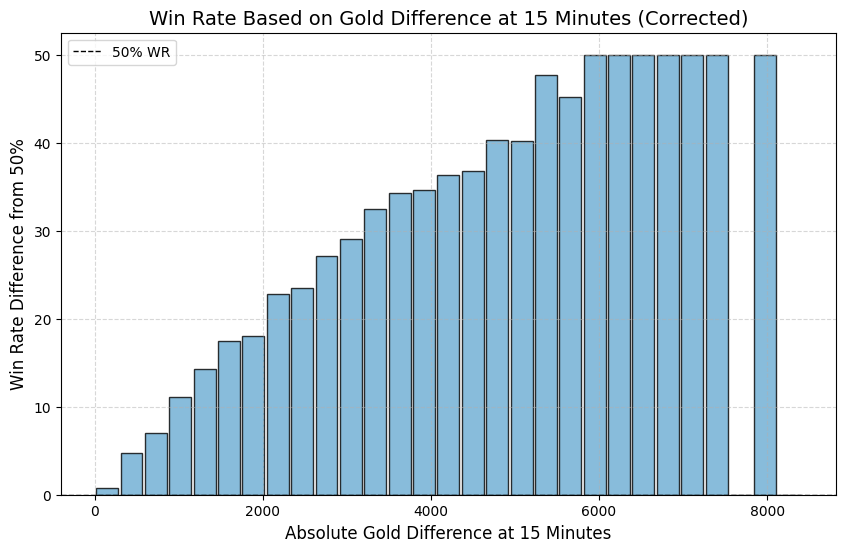

In [71]:
gold_diffs_abs = [abs(d["gold_diff"]) for d in gold_diffs]

# Define more bins for finer granularity
bins = np.linspace(0, max(gold_diffs_abs), 30)  # 10 bins from 0 to max gold difference

# Compute win rate per bin
# Compute win rates correctly by checking gold lead and corresponding winning team
win_rates = []
bin_centers = []

for i in range(len(bins) - 1):
    lower, upper = bins[i], bins[i + 1]
    in_bin = [d for d in gold_diffs if lower <= abs(d["gold_diff"]) < upper]

    if in_bin:
        wins = sum(1 for d in in_bin if (d["gold_diff"] > 0 and d["team_win"] == 100) or (d["gold_diff"] < 0 and d["team_win"] == 200))
        win_rate = (wins / len(in_bin)) * 100  # Win rate in percentage
    else:
        win_rate = 50  # Default to 50% if no data in bin
    
    bin_centers.append((lower + upper) / 2)
    win_rates.append(win_rate)

# Plot histogram of win rate vs. gold difference with corrected win rate calculation
plt.figure(figsize=(10, 6))
bars = plt.bar(bin_centers, [wr - 50 for wr in win_rates], width=(bins[1] - bins[0]) * 0.9, color="#6AABD2", edgecolor='black', alpha=0.8)

# Add a horizontal 50% WR reference line
plt.axhline(y=0, color='black', linestyle='dashed', linewidth=1, label="50% WR")

plt.xlabel("Absolute Gold Difference at 15 Minutes", fontsize=12)
plt.ylabel("Win Rate Difference from 50%", fontsize=12)
plt.title("Win Rate Based on Gold Difference at 15 Minutes (Corrected)", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Show the plot
plt.show()


Mean gold difference at 15 minutes: 100.86
Median gold difference at 15 minutes: 95.50
Standard deviation of gold difference at 15 minutes: 1696.55

Mean absolute gold difference at 15 minutes: 1349.73
Median absolute gold difference at 15 minutes: 1133.00
Standard deviation of absolute gold difference at 15 minutes: 1032.81


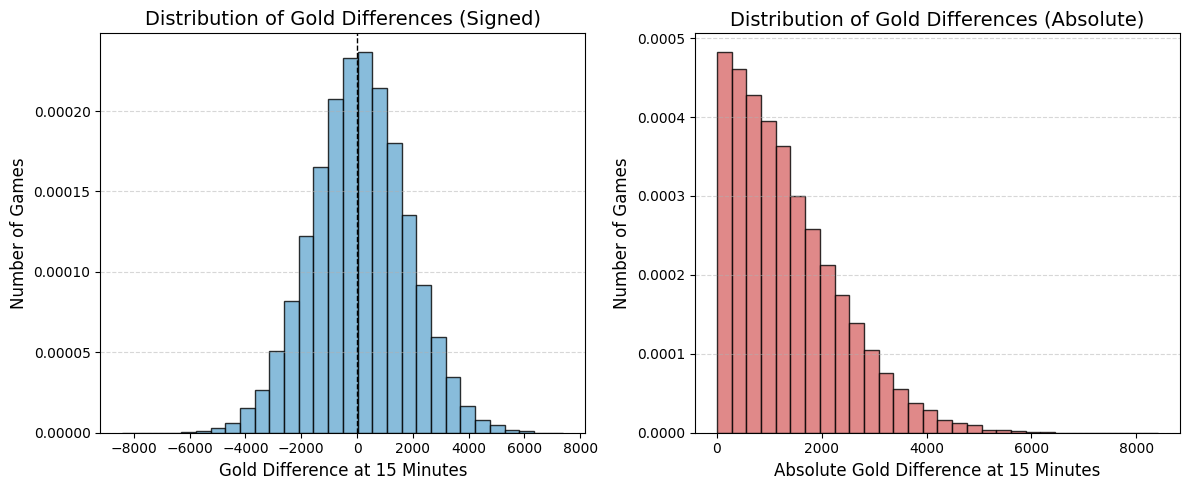

In [72]:
gold_diffs_vals = [d["gold_diff"] for d in gold_diffs]
gold_diffs_abs = [abs(d["gold_diff"]) for d in gold_diffs]

# Print summary statistics
print(f"Mean gold difference at 15 minutes: {np.mean(gold_diffs_vals):.2f}")
print(f"Median gold difference at 15 minutes: {np.median(gold_diffs_vals):.2f}")
print(f"Standard deviation of gold difference at 15 minutes: {np.std(gold_diffs_vals):.2f}")

# Print summary statistics for absolute gold differences
print(f"\nMean absolute gold difference at 15 minutes: {np.mean(gold_diffs_abs):.2f}")
print(f"Median absolute gold difference at 15 minutes: {np.median(gold_diffs_abs):.2f}")
print(f"Standard deviation of absolute gold difference at 15 minutes: {np.std(gold_diffs_abs):.2f}")

# Define number of bins
num_bins = 30

# Create figure with 2 subplots (2 cols, 1 row)
plt.figure(figsize=(12, 5))

# Plot histogram of raw (signed) gold differences
plt.subplot(1, 2, 1)
plt.hist(gold_diffs_vals, bins=num_bins, color="#6AABD2", edgecolor='black', alpha=0.8, density=True)
plt.xlabel("Gold Difference at 15 Minutes", fontsize=12)
plt.ylabel("Number of Games", fontsize=12)
plt.title("Distribution of Gold Differences (Signed)", fontsize=14)
plt.axvline(x=0, color='black', linestyle='dashed', linewidth=1)  # Reference line at 0
plt.grid(axis='y', linestyle="--", alpha=0.5)

# Plot histogram of absolute gold differences
plt.subplot(1, 2, 2)
plt.hist(gold_diffs_abs, bins=num_bins, color="#D96C6C", edgecolor='black', alpha=0.8, density=True)
plt.xlabel("Absolute Gold Difference at 15 Minutes", fontsize=12)
plt.ylabel("Number of Games", fontsize=12)
plt.title("Distribution of Gold Differences (Absolute)", fontsize=14)
plt.grid(axis='y', linestyle="--", alpha=0.5)

# Adjust layout for readability
plt.tight_layout()

In [73]:
for low, top in [(0, 500), (500, 1000), (1000, 2000), (2000, 3000), (3000, 4000), (4000, 5000), (6000, 10000)]:
    times = list(d["game_duration"] for d in gold_diffs if low <= abs(d["gold_diff"]) < top)
    
    print(f"Average game duration for gold difference between {low} and {top}: {np.mean(times):.2f}, Median: {np.median(times):.2f}, Std: {np.std(times):.2f} (n={len(times)})")

Average game duration for gold difference between 0 and 500: 27.94, Median: 27.91, Std: 6.04 (n=9230)
Average game duration for gold difference between 500 and 1000: 27.85, Median: 27.82, Std: 6.02 (n=8364)
Average game duration for gold difference between 1000 and 2000: 27.33, Median: 27.38, Std: 6.21 (n=12298)
Average game duration for gold difference between 2000 and 3000: 26.41, Median: 26.58, Std: 6.39 (n=6290)
Average game duration for gold difference between 3000 and 4000: 24.92, Median: 24.90, Std: 6.60 (n=2307)
Average game duration for gold difference between 4000 and 5000: 22.75, Median: 22.03, Std: 6.41 (n=625)
Average game duration for gold difference between 6000 and 10000: 18.25, Median: 16.60, Std: 3.89 (n=21)
